In [13]:
from slink.sequences import dict_generator, DictChain, IterativeDictProcessing, Repeater, _call_from_dict
from know.base import SlabsIter

In [30]:
import itertools

counter = itertools.count()

def count():
    return next(counter)
    f = DictChain(
        x=lambda: 7,
        _1=Repeater(3),
    )

[{"x": 7}, {"x": 7}, {"x": 7}]
f = DictChain(
    x=lambda: 7,
    _1=Repeater(3),
    y=lambda: next(counter),  # will return 0, then 1, then 2,
)
print(list(f()))
# [{'x': 7, 'y': 0}, {'x': 7, 'y': 1}, {'x': 7, 'y': 2}]

[{'x': 7, 'y': 0}, {'x': 7, 'y': 1}, {'x': 7, 'y': 2}]


In [47]:
import itertools
s = SlabsIter(x=lambda: 7,y=lambda: next(counter),z=Repeater('hey', 3)

    )

In [48]:
list(s) 

[{'x': 7, 'y': 6, 'z': 'hey'},
 {'x': 7, 'y': 7, 'z': 'hey'},
 {'x': 7, 'y': 8, 'z': 'hey'}]

In [45]:
class Repeater:
    def __init__(self, obj, n_iter):
        self.obj = obj
        self.n_iter=n_iter
        self.iterator = itertools.repeat(self.obj, self.n_iter)
    
    def __iter__(self):
        return self.iterator

    def __next__(self):
        return next(self.iterator)

    def __call__(self):
        return next(self)


# Rewrite IterativeDictProcessing

In [49]:
f = IterativeDictProcessing(
         phase=lambda session: session * 10,
         something_dependent=lambda session, phase: session + phase,
         something_independent=lambda: 'hi'
     )
f({'session': 2})
#{'session': 2, 'phase': 20, 'something_dependent': 22, 'something_independent': 'hi'}

{'session': 2,
 'phase': 20,
 'something_dependent': 22,
 'something_independent': 'hi'}

In [70]:
from meshed import DAG
from i2 import Sig

def phase(session):
    return session*10
def something_dependent(session, phase): 
    return session + phase
def something_independent():
    return 'hi'

class IterativeDictProcessingDAG:
    def __init__(self, *funcs):
        self.dag = DAG([*funcs])

    def __call__(self, **kwargs):
         _call_from_dict(kwargs=kwargs, func=self.dag, sig=Sig(self.dag))
         return self.dag.last_scope

dd = IterativeDictProcessingDAG(phase, something_dependent, something_independent)
assert dd(session= 201)=={'session': 201,
 'something_independent': 'hi',
 'phase': 2010,
 'something_dependent': 2211}

In [69]:
dd = IterativeDictProcessingDAG(phase, something_dependent, something_independent)
dd(session= 201)

{'session': 201,
 'something_independent': 'hi',
 'phase': 2010,
 'something_dependent': 2211}

In [47]:
d=DAG(phase, something_dependent, something_independent)
_call_from_dict(kwargs=dict(session= 2), func=d, sig=Sig(d))
#d.last_scope

20

In [46]:
vars(d)

{'func_nodes': [FuncNode(session -> phase_ -> phase)],
 'cache_last_scope': <function __main__.something_dependent(session, phase)>,
 'parameter_merge': <function __main__.something_independent()>,
 'new_scope': dict,
 'name': None,
 'extract_output_from_scope': <function meshed.util.extract_values(d: dict, keys: Iterable)>,
 'graph': {'session': [FuncNode(session -> phase_ -> phase)],
  FuncNode(session -> phase_ -> phase): ['phase']},
 'nodes': ['session', FuncNode(session -> phase_ -> phase), 'phase'],
 'var_nodes': ['session', 'phase'],
 '__signature__': <Sig (session)>,
 'roots': ('session',),
 'leafs': ('phase',),
 'last_scope': {'session': 2, 'phase': 20},
 '__name__': 'DAG'}

In [50]:
st = SlabsIter(
  phase=lambda session: session * 10,
         something_dependent=lambda session, phase: session + phase,
         something_independent=lambda: 'hi'

)

In [1]:
from meshed import DAG

In [63]:
def phase(session):
    return session*10
def something_dependent(session, phase): 
    return session + phase
def something_independent():
    return 'hi'

d = DAG(
    phase,
    something_dependent,
    something_independent

)

In [64]:
 from i2 import Sig
 _call_from_dict(kwargs=dict(session=201), func=d, sig=Sig(d))

2010

In [65]:
vars(d)

{'func_nodes': [FuncNode(session -> phase_ -> phase)],
 'cache_last_scope': <function __main__.something_dependent(session, phase)>,
 'parameter_merge': <function __main__.something_independent()>,
 'new_scope': dict,
 'name': None,
 'extract_output_from_scope': <function meshed.util.extract_values(d: dict, keys: Iterable)>,
 'graph': {'session': [FuncNode(session -> phase_ -> phase)],
  FuncNode(session -> phase_ -> phase): ['phase']},
 'nodes': ['session', FuncNode(session -> phase_ -> phase), 'phase'],
 'var_nodes': ['session', 'phase'],
 '__signature__': <Sig (session)>,
 'roots': ('session',),
 'leafs': ('phase',),
 'last_scope': {'session': 201, 'phase': 2010},
 '__name__': 'DAG'}

In [58]:
d.last_scope

{'session': 201,
 'something_independent': 'hi',
 'phase': 2010,
 'something_dependent': 2211}

# Scrap

In [71]:
!python --version


Python 3.10.0


In [72]:
from meshed import DAG, FuncNode

def foo(x):
    return x + 1

t = foo

def foo(y):
    return y * 2

tt = foo

d = DAG([t, tt])
d.func_nodes
f, ff = d.func_nodes
f.func_label, ff.func_label

('foo_', 'foo_')

In [73]:
d.dot_digraph()

ValueError: Some of your node names and/or outs where used more than once. They shouldn't. These are the names I find offensive: ['foo_', 'foo']

In [4]:
None or None or None

In [11]:
float(13 or 0)

13.0

In [14]:
from typing import Optional, Union

def f(x:Optional[Union[int, float]]):
    return x

In [15]:
f("gg")

'gg'

# Windows determination

In [6]:
import numpy as np

a = np.arange(100)[::-1]
np.percentile(a, 90)

89.10000000000001

In [8]:
a

array([99, 98, 97, 96, 95, 94, 93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83,
       82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66,
       65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49,
       48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32,
       31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15,
       14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1,  0])

In [9]:
np.nonzero(a<90)

(array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
        27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
        44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
        61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
        78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94,
        95, 96, 97, 98, 99]),)

In [12]:
!pip install more_itertools

     |████████████████████████████████| 52 kB 2.9 MB/s eta 0:00:011


In [28]:
from i2 import Pipe
from more_itertools import consecutive_groups

def indices_for_percentile(arr, low=0, high = 100):
    return np.percentile(arr, [low, high])

def consecutive_indices(arr):
    return list(map(list, consecutive_groups(arr)))

def filter 


[1]
[10, 11, 12]
[20]
[30, 31, 32, 33]
[40]


array([ 9.1, 33.7])

In [29]:
from py2store.utils.affine_conversion import get_affine_converter_and_inverse
affine_converter, inverse_affine_converter = get_affine_converter_and_inverse(scale=0.5,offset=0,target_type_cast=int)

In [89]:
def apply_func_to_index_groups(func, arr, idx_groups):
    """
    Applies func to the slices of array arr specified by the groups
    """
    result = [func(arr[gp]) for gp in idx_groups]

    return result


DFLT_WINDOW_OUTLIER = 30
DFLT_NUM_OUTLIERS = 3


def arg_top_max(arr, num_elements):
    """
    returns the largest num_elements from the array arr
    """
    result = [arr.index(i) for i in sorted(arr, reverse=True)][:num_elements]
    return result


from more_itertools import consecutive_groups


def indices_for_percentile(arr, low=0, high=100):
    return np.percentile(arr, [low, high])


def consecutive_indices(arr):
    return list(map(list, consecutive_groups(arr)))


def get_groups_extremities_all(
    arr,
    groups_indices,
    func=np.mean,
    num_outliers=DFLT_NUM_OUTLIERS,
):

    means = apply_func_to_index_groups(func, arr, groups_indices)
    arg = arg_top_max(means, num_outliers)
    print(f'{arg=}')
    result = [
        (groups_indices[idx][0], groups_indices[idx][-1])
        for idx, _ in enumerate(means)
        if idx in arg
    ]
    return result

In [90]:
arr = np.array([1,2,3,10,21,22,23,24, 11,12,21,22,23,24])
groups_indices = [[0,1,2,],[8,9]]
res = get_groups_extremities_all(arr, groups_indices, num_outliers = 1)
means = apply_func_to_index_groups(np.mean, arr, groups_indices)
res

arg=[1]


[(8, 9)]

In [4]:
import numpy as np
scores = np.array([0.6168595277532382, 0.6741733106012293, -1.1139169777195816, 0.654833844230351, 0.7373844747674398, 0.9688590169960354, -1.1139169777195816, -1.1139169777195816, 0.6168595277532359, 0.5831228257696716, 0.7089085119956521, -1.1139167716234863, -1.1139169777195816, -1.1139169777195816, 0.9630594985895795, 0.5279981100083243, -1.1139168094428245, -1.1139164871127434, 0.8989789586641862, -1.1139168094428245, -1.1139169777195816, -1.1139166411660673, 0.6741733106012372, 0.5279981100083327, -1.1139169777195816, 1.128614673878595, 0.6713320675092165, 0.913420715274694, -1.1139167116506667, 0.6713320675092106, 0.9931506430014206, -1.1139169777195816, 0.8383911894890441, -1.1139167895804476, 0.9309466022703364, -1.1139167716234863, -1.1139169777195816, 0.7727545346156318, 0.6886873215386187, 0.673167029538433, -1.1139167716234863, -1.1139169777195816, -1.1139167397403094, -1.1139168094428245, -1.1139169777195816, 0.9484133385697017, -1.1139169777195816, 0.660556709135128, 1.3790782178349172, 0.6753110767558935, 1.2093454260764394, 0.5321920751043577, 1.4247140118210364, 1.459134867190119, 0.9913370096958833, 0.8997272803338141, -1.1139169777195816, -1.1139168587299455, 0.6731670295384468, -1.1139169777195816, -1.1139169777195816, 0.7561476623861142, -1.1139169777195816, -1.1139168094428245, 0.5321920751043426, 0.6753110767558858, -1.1139167716234863, -1.1139166308081596, 0.5831228257696591, -1.1139169777195816, 1.3436791061793483, 0.9237991779531787, -1.1139169777195816, 1.0462710025207165, -1.1139166411660673, 1.0131871154789447, 1.1908641445222095, 1.5206163220822664])

In [73]:
arg_top_max([2.0, 11.5],3)

[2.0, 11.5]

In [79]:
result = [means.index(i) for i in sorted(means, reverse=True)][:2]
result


[1, 0]

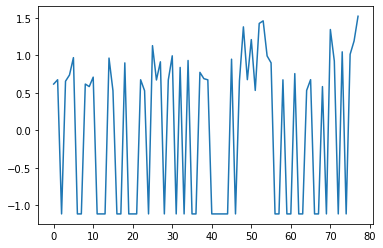

In [93]:
import matplotlib.pyplot as plt
plt.plot(scores)

In [70]:
from plunk.sb.front_demo.user_story1.utils.tools import (
    DFLT_CHUNKER,
    DFLT_FEATURIZER,
    DFLT_CHK_SIZE,
    chunker,
    featurizer,
    WaveForm,
    Stroll,
    clean_dict,
    scores_to_intervals,
    pyplot_with_intervals,
    indices_for_percentile,
    consecutive_indices,
    get_groups_extremities_all,
    apply_func_to_index_groups,
    arg_top_max,
    consecutive_groups
)

In [71]:
scores

array([ 0.61685953,  0.67417331, -1.11391698,  0.65483384,  0.73738447,
        0.96885902, -1.11391698, -1.11391698,  0.61685953,  0.58312283,
        0.70890851, -1.11391677, -1.11391698, -1.11391698,  0.9630595 ,
        0.52799811, -1.11391681, -1.11391649,  0.89897896, -1.11391681,
       -1.11391698, -1.11391664,  0.67417331,  0.52799811, -1.11391698,
        1.12861467,  0.67133207,  0.91342072, -1.11391671,  0.67133207,
        0.99315064, -1.11391698,  0.83839119, -1.11391679,  0.9309466 ,
       -1.11391677, -1.11391698,  0.77275453,  0.68868732,  0.67316703,
       -1.11391677, -1.11391698, -1.11391674, -1.11391681, -1.11391698,
        0.94841334, -1.11391698,  0.66055671,  1.37907822,  0.67531108,
        1.20934543,  0.53219208,  1.42471401,  1.45913487,  0.99133701,
        0.89972728, -1.11391698, -1.11391686,  0.67316703, -1.11391698,
       -1.11391698,  0.75614766, -1.11391698, -1.11391681,  0.53219208,
        0.67531108, -1.11391677, -1.11391663,  0.58312283, -1.11

In [77]:
[low, high] = list(indices_for_percentile(scores, low=0, high=90))
arr_selected = np.nonzero(scores>=high)[0]
arr_selected


array([25, 48, 50, 52, 53, 70, 76, 77])

In [78]:
groups_indices = consecutive_indices(arr_selected)
groups_indices

[[25], [48], [50], [52, 53], [70], [76, 77]]

In [83]:
result = get_groups_extremities_all(
    scores,
    groups_indices,
    func=np.mean,
    num_outliers=3,
)
result

[(48, 48), (52, 53), (76, 77)]

In [82]:
scores_to_intervals(scores, 90, 3)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [58]:
def get_groups_extremities_all2(
    arr,
    groups_indices,
    func=np.mean,
    num_outliers=3,
):

    means = apply_func_to_index_groups(func, arr, groups_indices)
    print(f"{means=}")
    arg = arg_top_max(means, num_outliers)
    print(f"{arg=}")
    # result = [
    #     (groups_indices[idx][0], groups_indices[idx][-1])
    #     for idx, _ in enumerate(means)
    #     if idx in arg
    # ]
    result = []
    return means

In [59]:
groups_indices

[[array([25, 48, 50, 52, 53, 70, 76, 77])]]

In [60]:
get_groups_extremities_all2(
    scores,
    groups_indices,
    func=np.mean,
    num_outliers=3,
)

means=[1.3320058461981164]
arg=[0]


[1.3320058461981164]

In [61]:
def consecutive_indices2(arr):
    return list(map(list, consecutive_groups(arr)))

In [62]:
arr = np.array([1,3,4,5,6,7,8,0,1])

In [65]:
groups_indices=consecutive_indices2(arr)

In [67]:
means = apply_func_to_index_groups(np.mean, arr, groups_indices)
means


[3.0, 4.5, 2.0]